# <font color='red'>TME ROBOTIQUE ET APPRENTISSAGE</font>
# <font color='red'>Stratégies d'Evolution et Robotique Autonome</font>

<font color="red">Version étudiant 2022</font>

*mise à jour: 9/3/2022*

Ce notebook doit être exécuté dans [Google Colab](colab.research.google.com/)

Vous devez déposer votre travail sur Moodle:
* déposer votre notebook, avec le nom de fichier *obligatoirement* au format suivant: **RA_NOM1_NOM2.ipynb**
* toutes les cellules exécutées
* des graphes et un bref commentaire lorsque c'est demandé
* la partie C ne sera pas évaluée

*Le sujet est à faire en binome.*

# COMPLETEZ LES CHAMPS CI-DESSOUS AVEC NOM/PRENOM/CARTE_ETU:

* Étudiant 1: **_Nom_ _Prénom_ _noCarteEtudiant_**
* Étudiant 2: **_Nom_ _Prénom_ _noCarteEtudiant_**



# <font color='orange'>PARTIE A: optimisation dans un espace de recherche continu</font>

# Importation des librairies et définition des fonctions utiles pour la partie A

Remarque: *Il est nécessaire d'exécuter ces cellules une seule fois. En cas de redémarrage du noyau, il faut relancer ces cellules. Il n'est pas nécessaire de regarder le code de ces cellules, elles servent seulement de soutien à la partie A.*

In [ ]:
from datetime import datetime
from datetime import date
#import importlib # une seule fois
import sys
import random
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.optimize import minimize

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2022-03-10 13:08:15 GMT
OK.


In [ ]:
#!pip install numpy scipy matplotlib pandas sympy nose
!pip install deap
!pip install cma
#!pip install --user pygame

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")

     |████████████████████████████████| 160 kB 5.5 MB/s 
     |████████████████████████████████| 248 kB 5.6 MB/s 

 2022-03-10 13:08:27 GMT
OK.


In [ ]:
# plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random
from scipy.optimize import minimize


def plot_results(my_func, my_points, min_x=-30, max_x=30, min_y=-30, max_y=30, nbx=100, nby=100, title="Title"):
    """Plots a 2D function with a heatmap and the points given as argument are plotted on top of it

    Plots a 2D function with a heatmap and the points given as argument are plotted on top of it:
    :param my_func: the function to plot on the background
    :param my_points: the points to plot
    :param min_x: min value of x
    :param max_x: max value of x
    :param min_y: min value of y
    :param max_y: max value of y
    :param nbx: number of my_func samples on the X-axis
    :param nby: number of my_func samples on the Y-axis
    :param title: title of the figure
    """
    X = np.linspace(min_x, max_x, num=nbx)
    Y = np.linspace(min_y, max_y, num=nby)
    Z=np.zeros((nbx,nby),dtype=np.double)
    for i in range(nbx):
        for j in range(nby):
            Z[i][j]=my_func([X[i],Y[j]])
    fig,ax=plt.subplots(figsize=(5,5))
    ax.set_xlim(min_x,max_x)
    ax.set_ylim(min_y,max_y)
    ax.imshow(Z, cmap='hot', interpolation='nearest',extent=(min_x,max_x,min_y,max_y))
    
    #print("Points: "+str(my_points))
    x=[]
    y=[]
    for p in my_points:
        x.append(p[0])
        y.append(p[1])

    ax.plot(x,y,".")
    ax.set_title(title)
    plt.show()

def plot_violin(res):
    """ Makes a violin plot of the results provided in the argument

    Makes a violin plot of the results provided in the argument.
    :param res: dictionary of the results to plot. The key is the name and the data is a vector of performance values.
    """
    fig,ax=plt.subplots(figsize=(5,5))
    data=[]
    labels=[]
    for k in res.keys():
        data.append(res[k])
        labels.append(k)
    ax.violinplot(data,
                   showmeans=False,
                   showmedians=True)
    ax.set_title('Violin plot')
    # adding horizontal grid lines
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(data))])
    ax.set_xlabel('Optimization methods')
    ax.set_ylabel('Best value found')

    # add x-tick labels
    plt.setp(ax, xticks=[y + 1 for y in range(len(data))],
        xticklabels=labels)
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()
  
print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2022-03-10 13:08:28 GMT
OK.


In [ ]:
# myEvalFn
# requires: CMA

import sys
import cma
import cma.purecma as purecma
from deap import benchmarks

def ackley(x):
    return benchmarks.ackley(x)[0]

def sphere(x):
    return benchmarks.sphere(x)[0]

def rastrigin(x):
    return benchmarks.rastrigin(x)[0]


#### #### ####

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2022-03-10 13:08:28 GMT
OK.


In [ ]:
# myEvalFn

def ackley(x):
    return benchmarks.ackley(x)[0]

def sphere(x):
    return benchmarks.sphere(x)[0]

def rastrigin(x):
    return benchmarks.rastrigin(x)[0]

init_pSG = False # WARNING: pSG.initAll() should NEVER be called BEFORE calling explore(.)
def explore(x):  # NOTE: display should be false whenever an optimiser is called
    global init_pSG
    if init_pSG == False:
        pSG.initAll()
        init_pSG = True
    return -pSG.evaluate(x)   # remember: we minimise!

#### #### ####

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2022-03-10 13:08:28 GMT
OK.


---

# Exercice A-0: recherche au hasard

Etudiez le code ci-dessous. Il s'agit d'un algorithme de recherche aléatoire, qui explore l'environnement naïvement et stocke le meilleur score obtenu jusqu'ici. Vous testerez cette bibliothèque sur la fonction de Sphere, Ackley, puis Rastrigin, en dimension 2 pour l'instant. Observez l'évolution de la population. 

Dans les exercices suivants, vous pouvez utiliser ce code comme point de départ en le modifiant librement.

Remarque: la variable *dimensions* définit le nombre de dimensions du problème. Dans l'exemple ci-dessous, le nombre de dimensions est fixé arbitrairement à 16. Notez que la fonction *plot_results* n'affiche que les deux premières dimensions, d'ou le fait que le meilleur individu peut s'approcher ou s'éloigner du centre (ou se trouve la meilleure solution). Vous pouvez aussi tester ce code (ainsi que ceux que vous écrirez) avec 2 dimensions seulement. La convergence sera plus rapide (voire très rapide), mais le rendu sera plus fidèle à l'exploration de l'espace de recherche, puisqu'entièrement représenté.

In [ ]:
# fourni a titre d'exemple, ne pas modifier -- reprendre ce code et le modifier dans les cellules suivantes pour répondre aux questions.

def launch_random(individual, nbeval=10000, display=True, ma_func=sphere):
    parent = np.array(individual)
    i=0
    j=0
    parentFit = ma_func(individual)
    bestFit = parentFit
    bestIt = 0
    while i<nbeval:
        child = np.random.uniform(-20,20,len(individual))
        childFit = ma_func(child)
        if childFit <= parentFit:
            parentFit = childFit
            parent = np.copy(child)
            if bestFit > parentFit:
                bestFit = parentFit
                bestIt = i
        j+=1
        solutions = np.array([parent])
        if display and ((j<10) or (j%100==0)):
            plot_results(ma_func,solutions, title="Gen %d"%(j)) # on projette uniquement sur les deux premières dimensions.
        i+=1
    print ("Best fit",bestFit,"at iteration",bestIt)
    return bestFit

dimensions = 16 # défini le nombre de dimensions de l'espace de recherche (remarque: seules les deux premières sont affichées avec la commande plot_results) 
launch_random([20]*dimensions,ma_func=sphere) # un vecteur de {dimensions} paramètres, dont on arbitrairement décidé que le point de départ était le vecteur {20,20,20,...,20}, ce qui correpond à une solution peu optimale.

print ("Terminé.")

_inclure ici quelques commentaires sur vos résultats_

---

# Exercice A-1: algorithme (1+1)-ES

Nous allons maintenant implementer une stratégie d'évolution (1+1)-ES avec un sigma fixe.

Vous testerez cet algorithme sur les mêmes fonctions que précédemment. Vous tracerez (comme montré à la question précédente) l'évolution de la population pour chaque exécution. Vous étudierez l'impact du choix du point initial et du sigma.

A noter que si la valeur de sigma peut influer significativement l'optimisation, l'initialisation compte aussi. Par exemple, si la solution initialement proposée se trouve dans une région ressemblant à un plateau (ie. plusieurs solutions proches obtiennent le même score), il sera difficile d'améliorer cette solution puisqu'une recherche locale s'apparentera à une marche aléatoire.

In [ ]:
def launch_oneplusone(individual, sigma, nbeval=10000, display=True, ma_func=sphere):
  # A compléter
  return 0

print ("Terminé.")

Terminé.


_inclure ici quelques commentaires sur vos résultats_

---

# Exercice A-2: algorithme (1+1)-ES, règle des 1/5e

Nous allons maintenant implementer une stratégie d'évolution (1+1)-ES avec un sigma suivant la règle des 1/5e.

Vous testerez cette algorithme sur les mêmes fonction que précédemment. Vous tracerez l'évolution de la population pour chaque exécution. Vous étudierez l'impact du choix du point initial et du sigma.

In [ ]:
def launch_ESonefifthRule(individual, sigma, nbeval=10000, display=True, ma_func=sphere):
  # A compléter  
  return 0

print ("Terminé.")

Terminé.


_inclure ici quelques commentaires sur vos résultats_

---

# Exercice A-3: algorithme (mu,lambda)-ES

Vous testerez cette algorithme sur les mêmes fonction que précédemment. 

La méthode (*mu*,*lambda*) est une généralisation de la méthode (1+1) vue précédemment (qu'on peut noter aussi (*mu*=1 + *lambda*=1). Etant donnée une population d'individus, il s'agit de prendre les *mu* meilleurs, puis de créer *lambda* enfants. Chaque enfant aura pour parent l'un des *mu* parents (sélectionné au hasard). La population à la génération suivante sera constituée uniquement des *lambda* enfants ainsi construits (contrairement à la méthode (*mu*+*lambda*) ou les *mu* parents sont aussi copiés vers la génération suivante). 

Vous tracerez l'évolution de la population pour chaque exécution. Vous étudierez l'impact du choix du point initial et du sigma. 

Vous prendrez pour commencer *mu*=5 et *lambda*=10. Comme point de départ, vous utiliserez une population initiale de *lambda* invididus générés au hasard (plutôt qu'un seul individu, comme c'était le cas précédemment).


In [ ]:
def launch_LambdaES(popInit, _mu, _lambda, sigma, nbeval=10000, display=True, ma_func=sphere):
  # A compléter
  return 0

print ("Terminé.")

Terminé.


_inclure ici quelques commentaires sur vos résultats_

---

# Exercice A-4: algorithme CMA-ES

Nous allons maintenant utiliser CMA-ES. La version standard est celle proposée dans la bibliothèque pycma (https://github.com/CMA-ES/pycma).

Vous testerez cette bibliothèque sur les mêmes fonctions que précédemment. De même que précédemment, vous tracerez l'évolution de la population pour chaque exécution. 

Vous étudierez l'impact du choix du point initial et du sigma. Vous comparerez également la version complète avec la version pureCMA, qui n'inclut pas certains mécanismes comme le restart. 

In [ ]:
def launch_cmaes_full(center, sigma, nbeval=10000, display=True, ma_func=sphere):
  # A compléter
  return 0

print ("Terminé.")

Terminé.


In [ ]:
# does not use restart
def launch_cmaes_pure(center, sigma, nbeval=10000, display=True, ma_func=sphere):
  # A compléter
  return 0

print ("Terminé.")

Terminé.


_inclure ici quelques commentaires sur vos résultats_

---

# Exercice A-5: stabilité des algorithmes d'optimisation stochastique

Vous allez maintenant comparer l'aspect stochastique de ces algorithmes. Pour cela, observez le code ci-dessous, qui affiche le résultat de plusieurs exécutions du même algorithme de recherche aléatoire sous forme de violin graph. Utilisez la fonction Sphere, tester aussi avec la fonction Rastrigin. 


Best fit 898.4403731511615 at iteration 965
Best fit 668.9349023531912 at iteration 878
Best fit 897.3649016066083 at iteration 870
Best fit 841.9702857343899 at iteration 820
Best fit 751.8388683298448 at iteration 636
Best fit 820.9516097919338 at iteration 325
Best fit 835.2812744417324 at iteration 314
Best fit 436.0738381913817 at iteration 787
Best fit 843.5706233999191 at iteration 315
Best fit 634.4672309392022 at iteration 267
Best fit 429.47731610892686 at iteration 537
Best fit 876.3954416631694 at iteration 468
Best fit 895.474080717316 at iteration 760
Best fit 873.2764526410923 at iteration 61
Best fit 721.1175695630216 at iteration 60
Best fit 739.0042822695159 at iteration 770
Best fit 856.5140847203066 at iteration 951
Best fit 716.1985888865206 at iteration 299
Best fit 584.0174813966726 at iteration 362
Best fit 813.7552341311623 at iteration 166
Best fit 549.0387419388666 at iteration 331
Best fit 779.1786565890924 at iteration 194
Best fit 912.9519177223843 at iter

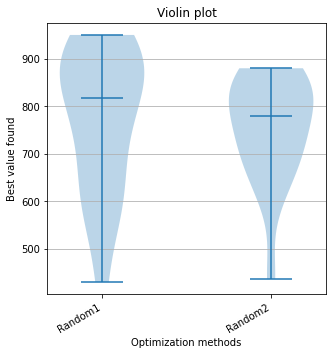

Terminé.


In [ ]:
# fourni a titre d'exemple, ne pas modifier -- répondre dans la cellule suivante.

resRandom1 = []
resRandom2 = []

evaluationBudget = 1000
centerInit = [20]*16
evalFunc = sphere

for i in range(20):
    resRandom1.append ( launch_random(centerInit,nbeval=evaluationBudget,display=False,ma_func=evalFunc) )
    resRandom2.append ( launch_random(centerInit,nbeval=evaluationBudget,display=False,ma_func=evalFunc) )    
    
allResults = {"Random1":resRandom1,"Random2":resRandom2}

plot_violin( allResults )

print ("Terminé.")


Testez la robustesse de CMA-ES sur plusieurs exécutions sur ces deux fonctions. Vous pouvez ré-utiliser le code de la cellule précédente pour afficher le résultat de plusieurs exécutions de CMAES (ex.: 5 exécutions).

In [ ]:
# A compléter

_inclure ici quelques commentaires sur vos résultats_

# Exercice A-6: comparaison entre les algorithmes

 Vous allez maintenant comparer tous les algorithmes précédents en traçant les résultat sur une même figure. Sur la même figure, vous tracerez aussi les résultats de deux méthodes classiques d'optimisation: Nelder-Mead et Powell.  Vous pouvez tout écrire dans la cellule ci-dessous.

_Remarque: Pour que les comparaisons soient équitables, il faut que les points de départ des optimisation "classiques" soient similaires. Vous pourrez éventuellement ajouter un diagramme représentant le nombre d'évaluation par méthode._

In [ ]:
def launch_nelder(center, nbeval=10000, display=False, ma_func=sphere):
    nelder = minimize(ma_func, center, method='nelder-mead',options={'xtol': 1e-8, 'disp': display})
    return nelder.fun

def launch_powell(center, nbeval=10000, display=False, ma_func=sphere):
    powell = minimize(ma_func, center, method='powell',options={'xtol': 1e-8, 'disp': display})
    return powell.fun

resCMAfull = []
resCMApure = []
resOneplusone = []
resRandom = []
resOneFifthRule = []
resNelder = []
resPowell = []

# A compléter

print ("Terminé.")

Terminé.


_inclure ici quelques commentaires sur vos résultats_

---
---
---

# <font color='orange'>PARTIE B: optimisation d'un pendule inversé</font>

OpenAI Gym (https://gym.openai.com/) est un framework permettant de lancer facilement des expériences d'apprentissage par renforcement. Nous allons l'utiliser pour tester les algorithmes évolutionnistes. Pour cet exercice, vous êtes laissé en autonomie: vous devez donc lire attentivement la documentation et les exemples.

# Importation des librairies et définition des fonctions utiles pour la partie B

Remarque: *Il est nécessaire d'exécuter ces cellules une seule fois. En cas de redémarrage du noyau, il faut relancer ces cellules. Il n'est pas nécessaire de regarder le code de ces cellules, elles servent seulement de soutien à la partie B.*

In [ ]:
# source: https://colab.research.google.com/drive/124koV4mf1tQ4av9jAJJuWsyuhJyLyd70#scrollTo=G9UWeToN4r7D

#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

from datetime import datetime
from datetime import date

from gym.wrappers import Monitor
import base64
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")

     |████████████████████████████████| 1.1 MB 4.3 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.



 2022-04-05 17:49:43 GMT
OK.


In [ ]:
# source: https://colab.research.google.com/drive/124koV4mf1tQ4av9jAJJuWsyuhJyLyd70#scrollTo=G9UWeToN4r7D
# modification mineur: ajout de l'argument loop dans la fonction show_video(loop=True)

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video(loop=True):
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    if loop == True:
      ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
      ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2022-04-05 17:49:43 GMT
OK.


In [ ]:
# A simple neural network object
# source: https://github.com/AsmaBRZ/Evolutionary-algorithms/blob/master/fixed_structure_nn_numpy.py

# coding: utf-8

import numpy as np

## Suppress TF info messages

import os

def sigmoid(x):
    return 1./(1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)


def gen_simplemlp(n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5):
    n_neurons = [n_neurons_per_hidden]*n_hidden_layers if np.isscalar(n_neurons_per_hidden) else n_neurons_per_hidden
    i = Input(shape=(n_in,))
    x = i
    for n in n_neurons:
        x = Dense(n, activation='sigmoid')(x)
    o = Dense(n_out, activation='tanh')(x)
    m = Model(inputs=i, outputs=o)
    return m
    

class SimpleNeuralControllerNumpy():
    def __init__(self, n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5, params=None):
        self.dim_in = n_in
        self.dim_out = n_out
        # if params is provided, we look for the number of hidden layers and neuron per layer into that parameter (a dicttionary)
        if (not params==None):
            if ("n_hidden_layers" in params.keys()):
                n_hidden_layers=params["n_hidden_layers"]
            if ("n_neurons_per_hidden" in params.keys()):
                n_neurons_per_hidden=params["n_neurons_per_hidden"]
        self.n_per_hidden = n_neurons_per_hidden
        self.n_hidden_layers = n_hidden_layers
        self.weights = None 
        self.n_weights = None
        self.init_random_params()
        self.out = np.zeros(n_out)
        #print("Creating a simple mlp with %d inputs, %d outputs, %d hidden layers and %d neurons per layer"%(n_in, n_out,n_hidden_layers, n_neurons_per_hidden))

    
    def init_random_params(self):
        if(self.n_hidden_layers > 0):
            self.weights = [np.random.random((self.dim_in,self.n_per_hidden))] # In -> first hidden
            self.bias = [np.random.random(self.n_per_hidden)] # In -> first hidden
            for i in range(self.n_hidden_layers-1): # Hidden -> hidden
                self.weights.append(np.random.random((self.n_per_hidden,self.n_per_hidden)))
                self.bias.append(np.random.random(self.n_per_hidden))
            self.weights.append(np.random.random((self.n_per_hidden,self.dim_out))) # -> last hidden -> out
            self.bias.append(np.random.random(self.dim_out))
        else:
            self.weights = [np.random.random((self.dim_in,self.dim_out))] # Single-layer perceptron
            self.bias = [np.random.random(self.dim_out)]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])

    def get_parameters(self):
        """
        Returns all network parameters as a single array
        """
        flat_weights = np.hstack([arr.flatten() for arr in (self.weights+self.bias)])
        return flat_weights

    def set_parameters(self, flat_parameters):
        """
        Set all network parameters from a single array
        """
        i = 0 # index
        to_set = []
        self.weights = list()
        self.bias = list()
        if(self.n_hidden_layers > 0):
            # In -> first hidden
            w0 = np.array(flat_parameters[i:(i+self.dim_in*self.n_per_hidden)])
            self.weights.append(w0.reshape(self.dim_in,self.n_per_hidden))
            i += self.dim_in*self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                w = np.array(flat_parameters[i:(i+self.n_per_hidden*self.n_per_hidden)])
                self.weights.append(w.reshape((self.n_per_hidden,self.n_per_hidden)))
                i += self.n_per_hidden*self.n_per_hidden
            # -> last hidden -> out
            wN = np.array(flat_parameters[i:(i+self.n_per_hidden*self.dim_out)])
            self.weights.append(wN.reshape((self.n_per_hidden,self.dim_out)))
            i += self.n_per_hidden*self.dim_out
            # Samefor bias now
            # In -> first hidden
            b0 = np.array(flat_parameters[i:(i+self.n_per_hidden)])
            self.bias.append(b0)
            i += self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                b = np.array(flat_parameters[i:(i+self.n_per_hidden)])
                self.bias.append(b)
                i += self.n_per_hidden
            # -> last hidden -> out
            bN = np.array(flat_parameters[i:(i+self.dim_out)])
            self.bias.append(bN)
            i += self.dim_out
        else:
            n_w = self.dim_in*self.dim_out
            w = np.array(flat_parameters[:n_w])
            self.weights = [w.reshape((self.dim_in,self.dim_out))]
            self.bias = [np.array(flat_parameters[n_w:])]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])
    
    def predict(self,x):
        """
        Propagate
        """
        if(self.n_hidden_layers > 0):
            #Input
            a = np.matmul(x,self.weights[0]) + self.bias[0]
            y = sigmoid(a)
            # hidden -> hidden
            for i in range(1,self.n_hidden_layers-1):
                a = np.matmul(y, self.weights[i]) + self.bias[i]
                y = sigmoid(a)
            # Out
            a = np.matmul(y, self.weights[-1]) + self.bias[-1]
            out = tanh(a)
            return out
        else: # Simple monolayer perceptron
            return tanh(np.matmul(x,self.weights[0]) + self.bias[0])

    def __call__(self,x):
        """Calling the controller calls predict"""
        return self.predict(x)

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2022-04-05 17:49:43 GMT
OK.


---

# Question B-0: simulation du pendule inversé

Le code ci-dessous montre comment lancer la simulation d'un pendule inversé en utilisant OpenAI Gym. Etudiez-le et exécutez-le.



In [ ]:
import gym
#env = gym.make('CartPole-v1')
env = wrap_env( gym.make('CartPole-v1') ) # colab-specific
observation = env.reset()

#for _ in range(1000):
#while True:
maxEvaluations = 10
evaluation = 0
while evaluation < maxEvaluations:
    env.render()
    action = env.action_space.sample() 
    observation, reward, done, info = env.step(action) 

    if done:
      evaluation = evaluation + 1
      observation = env.reset()
      print ("obs:",observation,type(observation),observation.shape)
      #show_video(False) # colab-specific

env.close()

show_video() # colab-specific

obs: [-0.01635288 -0.04880975  0.04754806 -0.00866207] <class 'numpy.ndarray'> (4,)
obs: [-0.04196627 -0.0306231   0.00955387 -0.02368327] <class 'numpy.ndarray'> (4,)
obs: [-0.01557151  0.0397129   0.02701138  0.0368987 ] <class 'numpy.ndarray'> (4,)
obs: [ 0.0440788   0.0146586  -0.03611251 -0.03944853] <class 'numpy.ndarray'> (4,)
obs: [-0.04227585 -0.02611193 -0.04747341  0.01915598] <class 'numpy.ndarray'> (4,)
obs: [0.00745251 0.00324553 0.01885095 0.00411939] <class 'numpy.ndarray'> (4,)
obs: [-0.0355992   0.00071403 -0.03334174  0.01957411] <class 'numpy.ndarray'> (4,)
obs: [0.02307011 0.01927857 0.01282482 0.04224424] <class 'numpy.ndarray'> (4,)
obs: [ 0.011911    0.00241626 -0.02059827 -0.04148214] <class 'numpy.ndarray'> (4,)
obs: [ 0.04438182 -0.02281195 -0.0441887  -0.00196603] <class 'numpy.ndarray'> (4,)


# Question B-1

En partant de l'exemple de la documentation et du code fourni pour le réseau de neurones dans la première cellule ci-dessous, faites une expérience pour optimiser les paramètres d'un réseau de neurones contrôlant un pendule inversé (environnement 'CartPole-v1') avec CMA-ES. Imposez une limite à 500 pas de temps au-delà de laquelle l'expérience est considérée comme réussie. 

In [ ]:
# Exemple de création d'un réseau de neurones multi-couches ("multi-layered perceptron")

nbInputs = 4
nbOutputs = 1
nbHiddenLayers = 2
nbNeuronsPerLayer = 5

nn=SimpleNeuralControllerNumpy(nbInputs,nbOutputs,nbHiddenLayers,nbNeuronsPerLayer) 

# NN parameters

theta = nn.get_parameters() # get default parameters
for i in range(len(theta)):
  theta[i] = random.random()*2.0-1.0 # set our own parameter values
nn.set_parameters(theta)
print ("NN parameters:",theta)

# running NN

observation = np.array( [ -0.03760372,0.00724161,-0.03663132,0.01225319 ], np.float64 )

print ("Input values:", observation)

outputValues = nn.predict(observation)

print ("Output values:", outputValues)


NN parameters: [ 0.23732401 -0.54824015  0.56420179 -0.60223708 -0.12175497 -0.10017512
  0.11060344 -0.04123484  0.53460053  0.9681448   0.90822511 -0.72015674
 -0.78113014  0.95943955  0.2836919   0.92346502  0.39254836 -0.88333627
  0.30005556 -0.3300035  -0.07170086 -0.5793902  -0.43930898 -0.24036992
  0.10646198 -0.31016272  0.90134714 -0.53677801 -0.33055263 -0.42307203
 -0.01960562  0.23096096  0.62205954  0.5062658  -0.42874864  0.26545502
  0.75040421  0.28502746 -0.59034454 -0.21210436  0.90650655 -0.96368946
  0.87694767  0.52626003 -0.43929901  0.78156607  0.97123667  0.65670635
 -0.89210937 -0.75919423 -0.91394167 -0.14740911 -0.63104782  0.53735303
  0.47129391  0.5051089   0.86608239  0.6755216   0.18020839  0.00197938
 -0.04320713]
Input values: [-0.03760372  0.00724161 -0.03663132  0.01225319]
Output values: [-0.16196555]


In [ ]:
# A compléter 

_inclure ici quelques commentaires sur vos résultats_

--- 

# Question B-2

Re-calculez plusieurs fois la fitness du meilleur contrôleur généré. Visualisez les comportements correspondants. Que constatez-vous ? Quel est le problème ? Proposez une solution pour le résoudre.

In [ ]:
# A compléter

_inclure ici quelques commentaires sur vos résultats_

---
---
---

# <font color='orange'>PARTIE C: exercices bonus</font>

Si vous avez fini tout le reste... A faire en complète autonomie.


# Question C-1: 

A partir de l'implémentation (1+lambda)-ES, implémenter (1) un algorithme (1,lambda)-ES, puis (mu+lambda)-ES et (mu,lambda)-ES. Etudiez l'influence des valeurs de mu et lambda.


In [ ]:
# A compléter

# Question C-2: 

Implémentez l'algorithme CEM (Cross-Entropy Method) vu en cours. Comparez avec les algorithmes précédents, y compris CMA-ES.

In [ ]:
# A compléter

# Question C-3:

A partir de l'expérience du pendule inversé, faites le même genre d'expériences avec d'autres environnement proposé dans OpenAI gym, par exemple le BipedalWalker (attention, le temps nécessaire pour l'optimisation peut rapidement devenir très long)


In [ ]:
# A compléter

*Fin du sujet.*
